# TAXONOMICAL CLASSIFICATION OF BIRD ORDERS
Student Name: Arif Çakır

E-mail: cakirar19@itu.edu.tr

Student Number: 090190355

## Data Preparation and Pre-analysis
In this part, dataset is imported from datadryad.org, and then prepared for analysis.

In [23]:
import pandas as pd

df = pd.read_excel("https://datadryad.org/stash/downloads/file_stream/401942").dropna()
df.head()

,class,order,family,genus,spp,species,clutch.size,max.longevity,incubation,dev.mode,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin,qc,sample.size,references
1,Aves,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,SA,32.00,4.86920,40.00,452.000,wild,acceptable,medium,"1, 2 & 3"
2,Aves,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,SA,41.65,8.16368,58.00,988.750,wild,acceptable,medium,"1, 2 & 3"
3,Aves,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,SA,24.25,2.31028,19.30,138.500,wild,acceptable,medium,"1, 2 & 3"
5,Aves,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,A,16.00,0.94276,3.15,30.175,wild,acceptable,medium,"1, 2 & 3"
6,Aves,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,A,13.50,0.46620,1.65,11.900,wild,acceptable,medium,"1, 2 & 3"


Due to "references", "sample.size" and "qc" columns are being not relevant to the project, they are dropped from the dataset. Also, rows with questionable, low or high quality control score ("qc" column) are removed from the dataset. 

In [24]:
df = df[df["qc"]== "acceptable"].drop(["references","sample.size","qc"],axis=1) 
#only took acceptable rows and dropped irrelevant parts from dataset
df.head()

,class,order,family,genus,spp,species,clutch.size,max.longevity,incubation,dev.mode,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin
1,Aves,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,SA,32.00,4.86920,40.00,452.000,wild
2,Aves,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,SA,41.65,8.16368,58.00,988.750,wild
3,Aves,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,SA,24.25,2.31028,19.30,138.500,wild
5,Aves,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,A,16.00,0.94276,3.15,30.175,wild
6,Aves,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,A,13.50,0.46620,1.65,11.900,wild


Gathering statistical information:

In [25]:
df.describe()

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.078823,21.104239,22.679160,35.863940,4.500832,33.081590,648.917593
std,2.088563,13.989003,10.069559,25.808779,5.088058,49.867546,1315.777309
min,1.000000,3.000000,10.500000,8.500000,0.155400,0.500000,3.142500
25%,2.750000,11.000000,14.000000,16.387500,0.991837,3.168750,34.975000
50%,4.000000,18.000000,21.325000,29.250000,2.481220,12.450000,132.875000
75%,4.900000,26.700000,28.000000,46.000000,5.959590,44.625000,696.234408
max,14.000000,120.000000,72.000000,180.000000,32.696160,331.000000,10500.000000


In [26]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 619
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            500 non-null    object 
 1   order            500 non-null    object 
 2   family           500 non-null    object 
 3   genus            500 non-null    object 
 4   spp              500 non-null    object 
 5   species          500 non-null    object 
 6   clutch.size      500 non-null    float64
 7   max.longevity    500 non-null    float64
 8   incubation       500 non-null    float64
 9   dev.mode         500 non-null    object 
 10  fledging.age     500 non-null    float64
 11  brain.mass       500 non-null    float64
 12  egg.mass         500 non-null    float64
 13  body.mass        500 non-null    float64
 14  specimen.origin  500 non-null    object 
dtypes: float64(7), object(8)
memory usage: 62.5+ KB


In [27]:
df.nunique()

class                1
order               27
family              98
genus              329
spp                439
species            500
clutch.size        170
max.longevity      293
incubation         146
dev.mode             4
fledging.age       198
brain.mass         367
egg.mass           392
body.mass          474
specimen.origin      3
dtype: int64

column named "class" is dropped from dataset due to the fact that all birds are a "bird".

In [28]:
df = df.drop("class",axis=1)
df

,order,family,genus,spp,species,clutch.size,max.longevity,incubation,dev.mode,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin
1,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,SA,32.00,4.86920,40.000,452.000000,wild
2,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,SA,41.65,8.16368,58.000,988.750000,wild
3,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,SA,24.25,2.31028,19.300,138.500000,wild
5,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,A,16.00,0.94276,3.150,30.175000,wild
6,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,A,13.50,0.46620,1.650,11.900000,wild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Passeriformes,Emberizidae,Zonotrichia,albicollis,Zonotrichia_albicollis,4.07,14.916667,13.00,A,10.00,1.08780,2.770,25.350000,wild
616,Passeriformes,Emberizidae,Zonotrichia,leucophrys,Zonotrichia_leucophrys,3.95,13.340000,12.60,A,10.00,1.00492,2.830,27.960000,wild
617,Passeriformes,Turdidae,Zoothera,naevia,Zoothera_naevia,3.00,5.600000,14.00,A,14.00,1.77156,7.300,79.225000,wild
618,Passeriformes,Zosteropidae,Zosterops,japonicus,Zosterops_japonicus,3.15,5.100000,11.00,A,10.00,0.55944,1.130,11.250000,wild


"specimen.origin" and "dev.mode" are logistic variables, because of that they got one hot encoded.

In [29]:
df = pd.get_dummies(df,columns = ["specimen.origin","dev.mode"])
df

,order,family,genus,spp,species,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0
2,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0
3,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0
5,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0
6,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Passeriformes,Emberizidae,Zonotrichia,albicollis,Zonotrichia_albicollis,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0
616,Passeriformes,Emberizidae,Zonotrichia,leucophrys,Zonotrichia_leucophrys,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0
617,Passeriformes,Turdidae,Zoothera,naevia,Zoothera_naevia,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0
618,Passeriformes,Zosteropidae,Zosterops,japonicus,Zosterops_japonicus,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0


## Hierarchial Clustering and SVM

### 2.1: Hierarchial Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
dfh = df.iloc[:,5:] # Prepared dataset for hierarchial clustering, removed clusters. 
dfh

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0
2,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0
3,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0
5,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0
6,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0
616,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0
617,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0
618,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0


In [31]:
scaler = StandardScaler()
dfh_scaled = scaler.fit_transform(dfh)
dfh_normalized = normalize(dfh_scaled)

In [32]:
dfh_n = pd.DataFrame(dfh_normalized)
dfh_n

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.043753,-0.018570,0.236628,-0.050451,0.024397,0.046751,-0.050432,-0.194362,-0.093770,0.231998,-0.375196,-0.163044,0.807718,-0.117139
1,-0.085016,0.019643,0.367729,0.068773,0.220835,0.153286,0.079229,-0.176931,-0.085361,0.211193,-0.341549,-0.148423,0.735283,-0.106634
2,0.026044,-0.027355,0.325698,-0.142995,-0.136808,-0.087820,-0.123269,-0.183280,-0.088424,0.218770,-0.353804,-0.153748,0.761666,-0.110460
3,0.025536,-0.346740,-0.357496,-0.338744,-0.307777,-0.264171,-0.206967,-0.253851,-0.122470,0.303006,0.394504,-0.212948,-0.183252,-0.152992
4,0.278718,-0.271456,-0.373385,-0.354932,-0.324800,-0.258174,-0.198305,-0.236249,-0.113978,0.281996,0.367149,-0.198182,-0.170546,-0.142383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.001821,-0.190630,-0.414271,-0.431902,-0.289099,-0.261968,-0.204248,-0.248578,-0.119927,0.296713,0.386310,-0.208525,-0.179446,-0.149814
496,-0.026072,-0.234610,-0.423106,-0.423606,-0.290431,-0.256428,-0.199487,-0.243803,-0.117623,0.291014,0.378890,-0.204520,-0.176000,-0.146937
497,-0.212403,-0.455744,-0.354425,-0.348352,-0.220573,-0.212593,-0.178039,-0.237171,-0.114423,0.283097,0.368583,-0.198956,-0.171212,-0.142940
498,-0.164401,-0.422930,-0.428767,-0.370465,-0.286364,-0.236862,-0.179156,-0.213218,-0.102867,0.254506,0.331358,-0.178863,-0.153921,-0.128503


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
dfh_principal = pca.fit_transform(dfh_n)
dfh_principal = pd.DataFrame(dfh_principal)

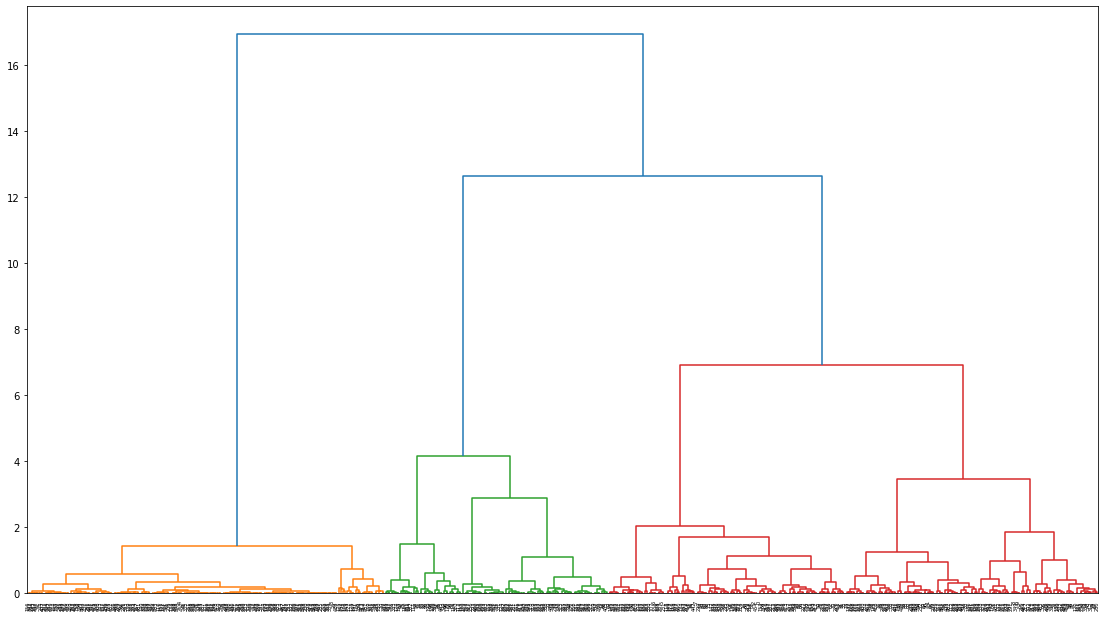

In [34]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(19.2,10.8))
Dendrogram = shc.dendrogram((shc.linkage(dfh_principal, method ='ward')))



In [35]:
cluster = AgglomerativeClustering().fit(dfh_principal)

In [36]:
dfh_principal

,0,1
0,0.438078,-0.453490
1,0.662794,-0.395626
2,0.323461,-0.435170
3,-0.816724,-0.065913
4,-0.801298,-0.094116
...,...,...
495,-0.804361,-0.042775
496,-0.807616,-0.042741
497,-0.758331,-0.039570
498,-0.781872,-0.035784


<AxesSubplot:>

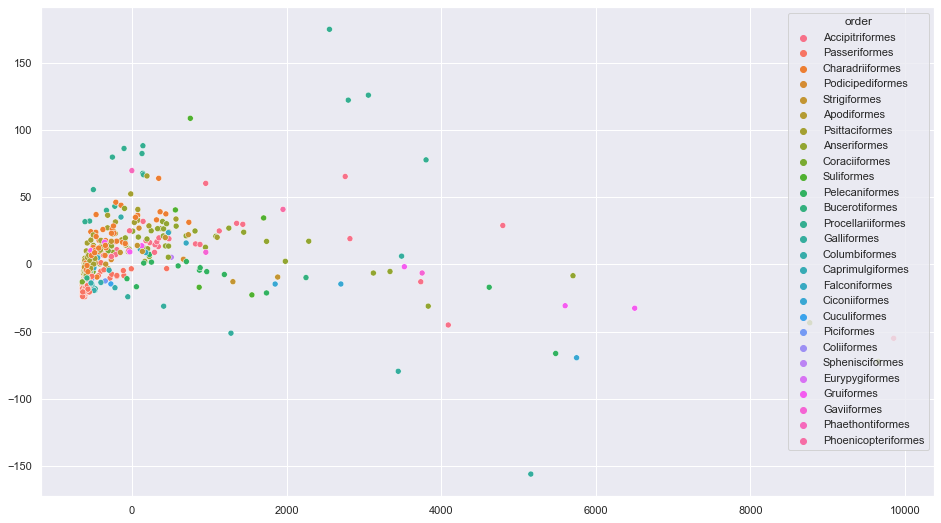

In [38]:
from sklearn.decomposition import PCA
import seaborn as sns
sns.set(rc={'figure.figsize':(16,9)})

pca = PCA(n_components=2)
X = pca.fit_transform(dfh)

sns.scatterplot(x=X[:,0],y=X[:,1],hue=df['order'])

<AxesSubplot:>

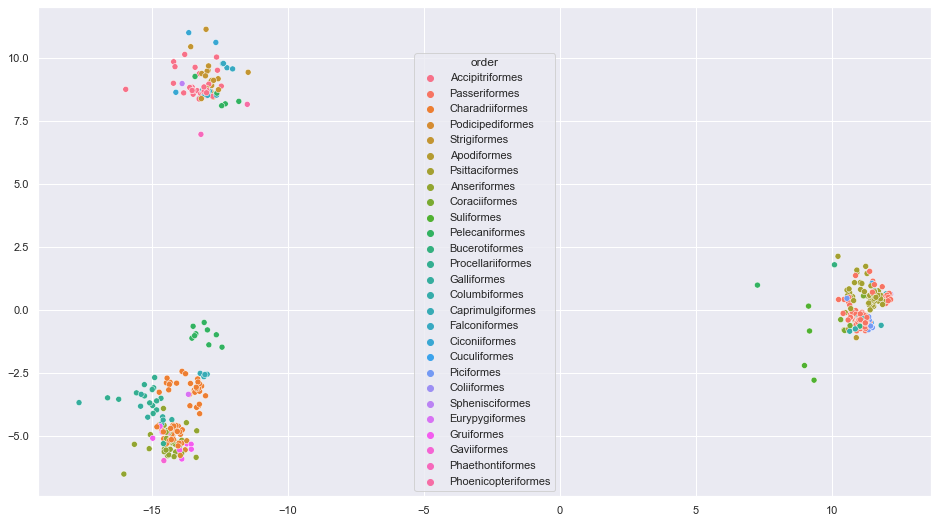

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X = lda.fit_transform(dfh, df["order"])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df['order'])